In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Machine_Downtime.csv')

In [3]:
df.head()


,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 9   Spindle_Vibration(?m)            2489 non-null   float64
 10  Tool_Vibration(?m)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [5]:
df.shape

(2500, 16)

In [6]:
df.Downtime.value_counts()

,count
Downtime,
Machine_Failure,1265
No_Machine_Failure,1235


In [7]:
df.isnull().sum()

,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),10
Coolant_Pressure(bar),19
Air_System_Pressure(bar),17
Coolant_Temperature,12
Hydraulic_Oil_Temperature(?C),16
Spindle_Bearing_Temperature(?C),7
Spindle_Vibration(?m),11


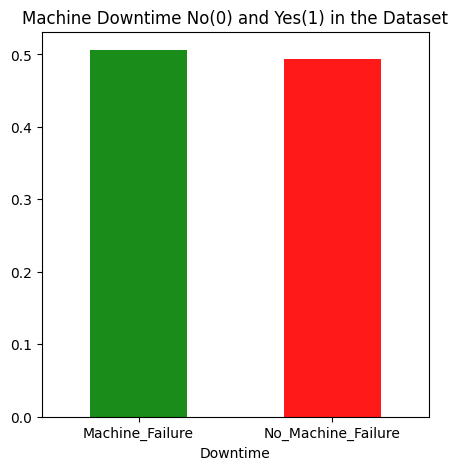

In [10]:
fig = plt.figure(figsize = (5,5))
df.Downtime.value_counts(normalize = True).plot(kind='bar', color= ['green','red'], alpha = 0.9, rot=0)
plt.title('Machine Downtime No(0) and Yes(1) in the Dataset')
plt.show()

We can see above the dataset is already balanced so no need for balancing


In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Torque(Nm),21,0.0084
Coolant_Pressure(bar),19,0.0076
Air_System_Pressure(bar),17,0.0068
Hydraulic_Oil_Temperature(?C),16,0.0064
Coolant_Temperature,12,0.0048


In [15]:
df['Torque(Nm)'] = df['Torque(Nm)'].fillna(df['Torque(Nm)'].mode()[0])
df['Coolant_Pressure(bar)'] = df['Coolant_Pressure(bar)'].fillna(df['Coolant_Pressure(bar)'].mode()[0])
df['Air_System_Pressure(bar)'] = df['Air_System_Pressure(bar)'].fillna(df['Air_System_Pressure(bar)'].mode()[0])
df['Hydraulic_Oil_Temperature(?C)'] = df['Hydraulic_Oil_Temperature(?C)'].fillna(df['Hydraulic_Oil_Temperature(?C)'].mode()[0])
df['Coolant_Temperature'] = df['Coolant_Temperature'].fillna(df['Coolant_Temperature'].mode()[0])
df['Hydraulic_Pressure(bar)'] = df['Hydraulic_Pressure(bar)'].fillna(df['Hydraulic_Pressure(bar)'].mode()[0])
df['Spindle_Bearing_Temperature(?C)'] = df['Spindle_Bearing_Temperature(?C)'].fillna(df['Spindle_Bearing_Temperature(?C)'].mode()[0])
df['Spindle_Vibration(?m)'] = df['Spindle_Vibration(?m)'].fillna(df['Spindle_Vibration(?m)'].mode()[0])
df['Tool_Vibration(?m)'] = df['Tool_Vibration(?m)'].fillna(df['Tool_Vibration(?m)'].mode()[0])
df['Spindle_Speed(RPM)'] = df['Spindle_Speed(RPM)'].fillna(df['Spindle_Speed(RPM)'].mode()[0])
df['Voltage(volts)'] = df['Voltage(volts)'].fillna(df['Voltage(volts)'].mode()[0])
df['Cutting(kN)'] = df['Cutting(kN)'].fillna(df['Cutting(kN)'].mode()[0])

In [16]:
df.isnull().sum()


,0
Date,0
Machine_ID,0
Assembly_Line_No,0
Hydraulic_Pressure(bar),0
Coolant_Pressure(bar),0
Air_System_Pressure(bar),0
Coolant_Temperature,0
Hydraulic_Oil_Temperature(?C),0
Spindle_Bearing_Temperature(?C),0
Spindle_Vibration(?m),0


In [20]:
from sklearn.preprocessing import LabelEncoder

lencoders = {}

for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [22]:
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(df), index=df.index, columns=df.columns)

In [31]:
modified_data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,1.000000,0.0,0.0,0.415760,0.599431,0.419680,0.228480,0.412214,0.401487,0.711906,0.558499,0.926137,0.480144,0.433020,0.835681,0.0
1,1.000000,0.0,0.0,0.680168,0.418312,0.389365,0.331562,0.465649,0.446097,0.748883,0.530541,0.710234,0.599278,0.255667,0.413146,0.0
2,1.000000,1.0,1.0,0.416149,0.590876,0.546972,0.095643,0.209924,0.386617,0.723283,0.652978,0.710055,0.444043,0.432911,0.821596,0.0
3,0.993865,0.5,0.5,0.748401,0.385431,0.514313,0.215728,0.343511,0.669145,0.438440,0.657179,0.660336,0.570397,0.465507,0.821596,0.0
4,0.987730,0.0,0.0,0.364475,0.595753,0.370298,0.000000,0.461832,0.327138,0.586753,0.536095,0.948814,0.548736,0.459312,0.821596,0.0


In [25]:
from sklearn.feature_selection import SelectKBest, chi2

X = modified_data.loc[:,df.columns!='Downtime']
y = modified_data[['Downtime']]

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.columns[selector.get_support(indices=True)])

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Coolant_Temperature',
       'Spindle_Bearing_Temperature(?C)', 'Spindle_Speed(RPM)', 'Torque(Nm)',
       'Cutting(kN)'],
      dtype='object')


In [30]:
X_new.shape

(2500, 10)

In [33]:
features = df[['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Coolant_Temperature',
'Spindle_Bearing_Temperature(?C)', 'Spindle_Speed(RPM)', 'Torque(Nm)','Cutting(kN)']]
target = df['Downtime']

Model Training using Train-Test-Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

In [35]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):

    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))

    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)


    return model, accuracy, roc_auc

Logistic Regression

Accuracy = 0.842
ROC Area under Curve = 0.8425293242226882
              precision    recall  f1-score   support

           0    0.87826   0.79842   0.83644       253
           1    0.81111   0.88664   0.84720       247

    accuracy                        0.84200       500
   macro avg    0.84469   0.84253   0.84182       500
weighted avg    0.84509   0.84200   0.84175       500



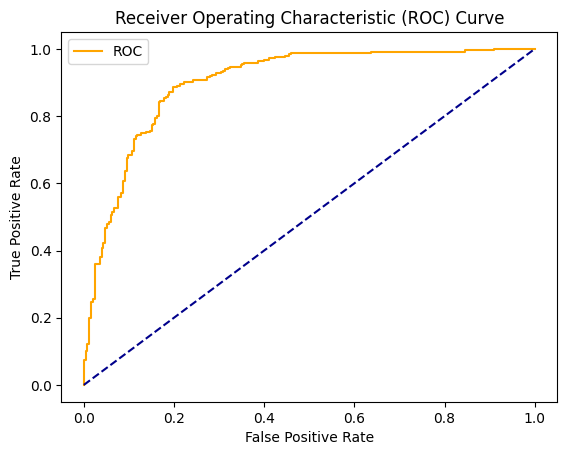

In [39]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
model_lr, accuracy_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [ ]:
Decision Tree

Accuracy = 0.978
ROC Area under Curve = 0.978116848826231
              precision    recall  f1-score   support

           0    0.98790   0.96838   0.97804       253
           1    0.96825   0.98785   0.97796       247

    accuracy                        0.97800       500
   macro avg    0.97808   0.97812   0.97800       500
weighted avg    0.97820   0.97800   0.97800       500



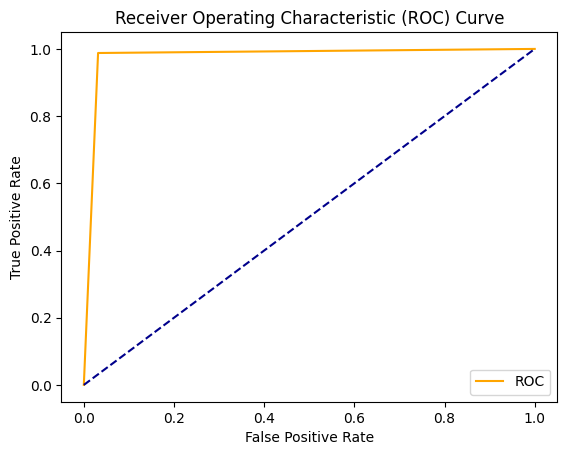

In [40]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(max_depth = 16, max_features = "sqrt")
model_dt, accuracy_dt, roc_auc_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Random Forest

Accuracy = 0.98
ROC Area under Curve = 0.9800451264982157
              precision    recall  f1-score   support

           0    0.98406   0.97628   0.98016       253
           1    0.97590   0.98381   0.97984       247

    accuracy                        0.98000       500
   macro avg    0.97998   0.98005   0.98000       500
weighted avg    0.98003   0.98000   0.98000       500



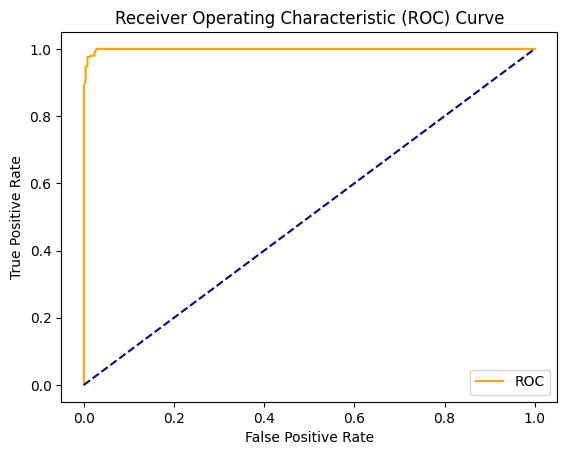

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth = 16, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state = 123)
model_rf, accuracy_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

<ipython-input-47-9f2b7de04fcb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='summer')


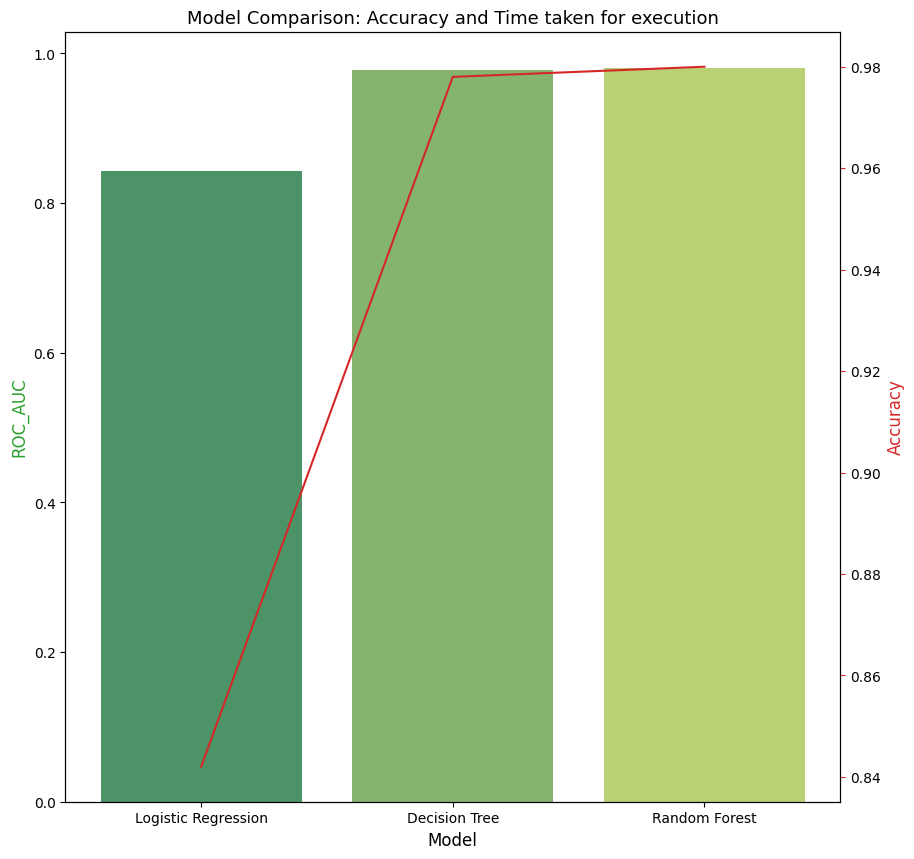

In [47]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('ROC_AUC', fontsize=12, color=color)
ax2 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=12, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)